In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
image = cv2.imread('/content/Screenshot 2023-09-28 at 17.39.13.png',cv2.IMREAD_COLOR)


In [ ]:
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#converting the image to grayscale

In [ ]:
#define parameters for Harris cirner detection
block_size = 2  #Neighborhood size for corner detection
ksize = 3 #Apertu
k = 0.04


In [ ]:

harris_responce = cv2.cornerHarris(gray_image,blockSize=block_size,ksize=ksize,k=k)

In [ ]:

threshold = 0.01 * harris_responce.max()
corner_mask = harris_responce > threshold


In [ ]:
image_with_corners = image.copy()
image_with_corners[corner_mask] = [0,0,255]


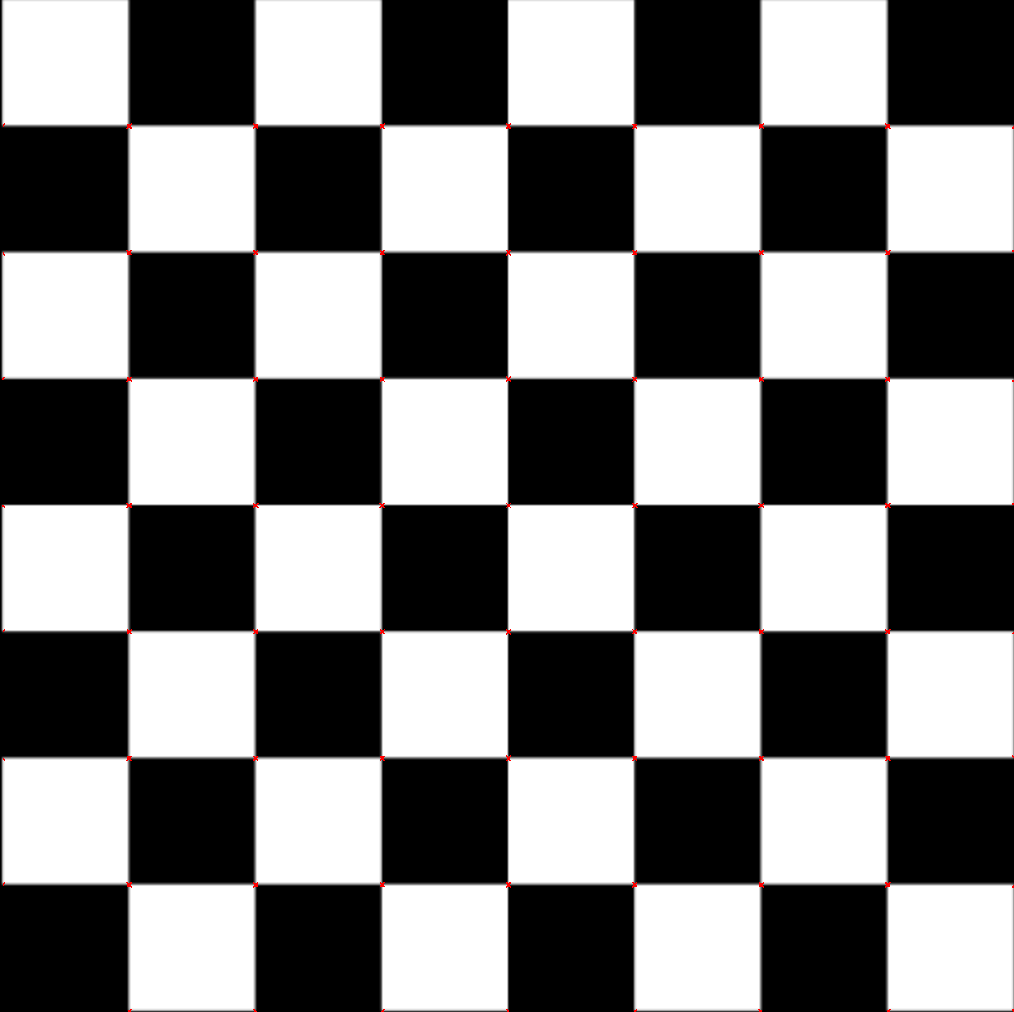

In [ ]:
cv2_imshow(image_with_corners)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
# SURF

In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [3]:
image = cv2.imread('/content/Screenshot 2023-09-12 at 15.34.26.png',cv2.IMREAD_COLOR)

In [4]:
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [6]:
orb = cv2.ORB_create()

In [14]:
keypoints,descriptor = orb.detectAndCompute(gray_image,None)

In [15]:
image_with_keypoints = cv2.drawKeypoints(image,keypoints,outImage=None)


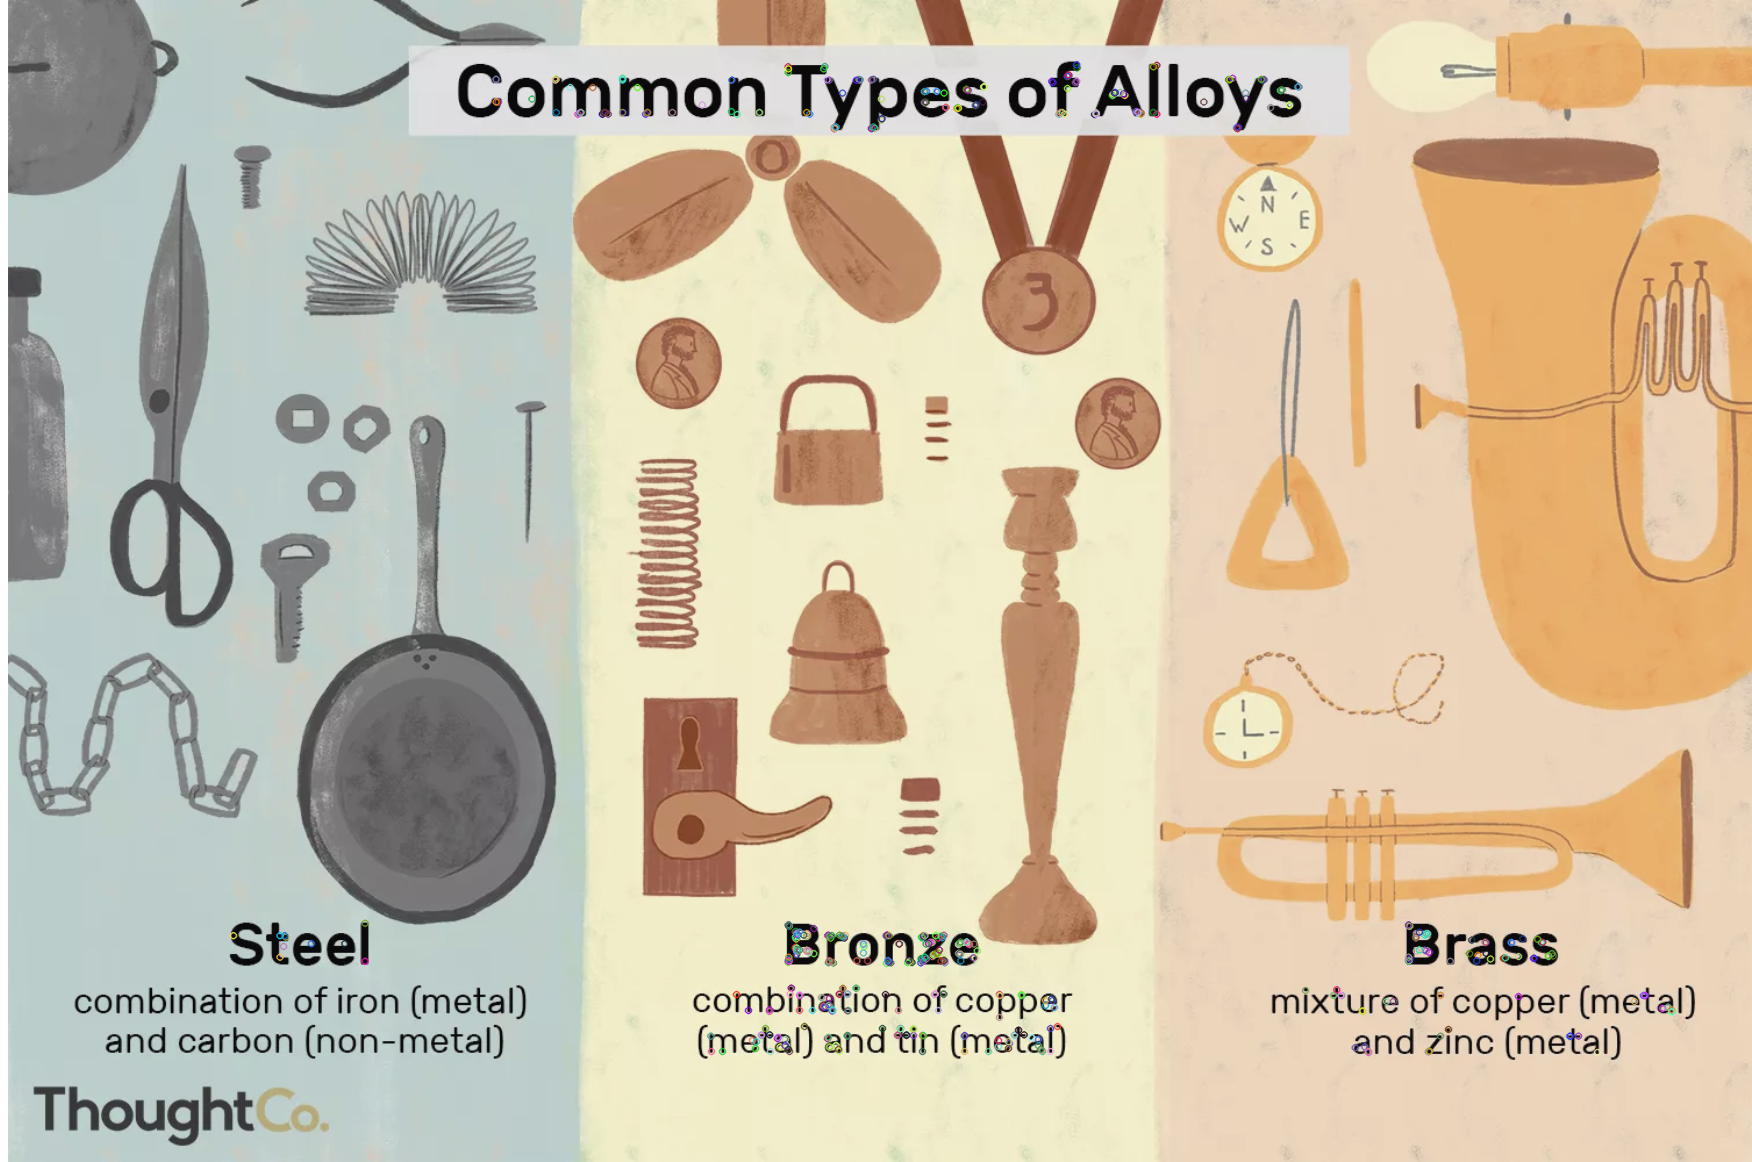

In [16]:
cv2_imshow(image_with_keypoints)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:

#fast

In [18]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [19]:
image = cv2.imread('/content/Screenshot 2023-09-12 at 15.34.26.png',cv2.IMREAD_COLOR)

In [21]:
fast = cv2.FastFeatureDetector_create()

In [22]:
keypoints = fast.detect(image,None)

In [23]:
image_with_keypoints = cv2.drawKeypoints(image,keypoints,outImage=None,color=(255,0,0))

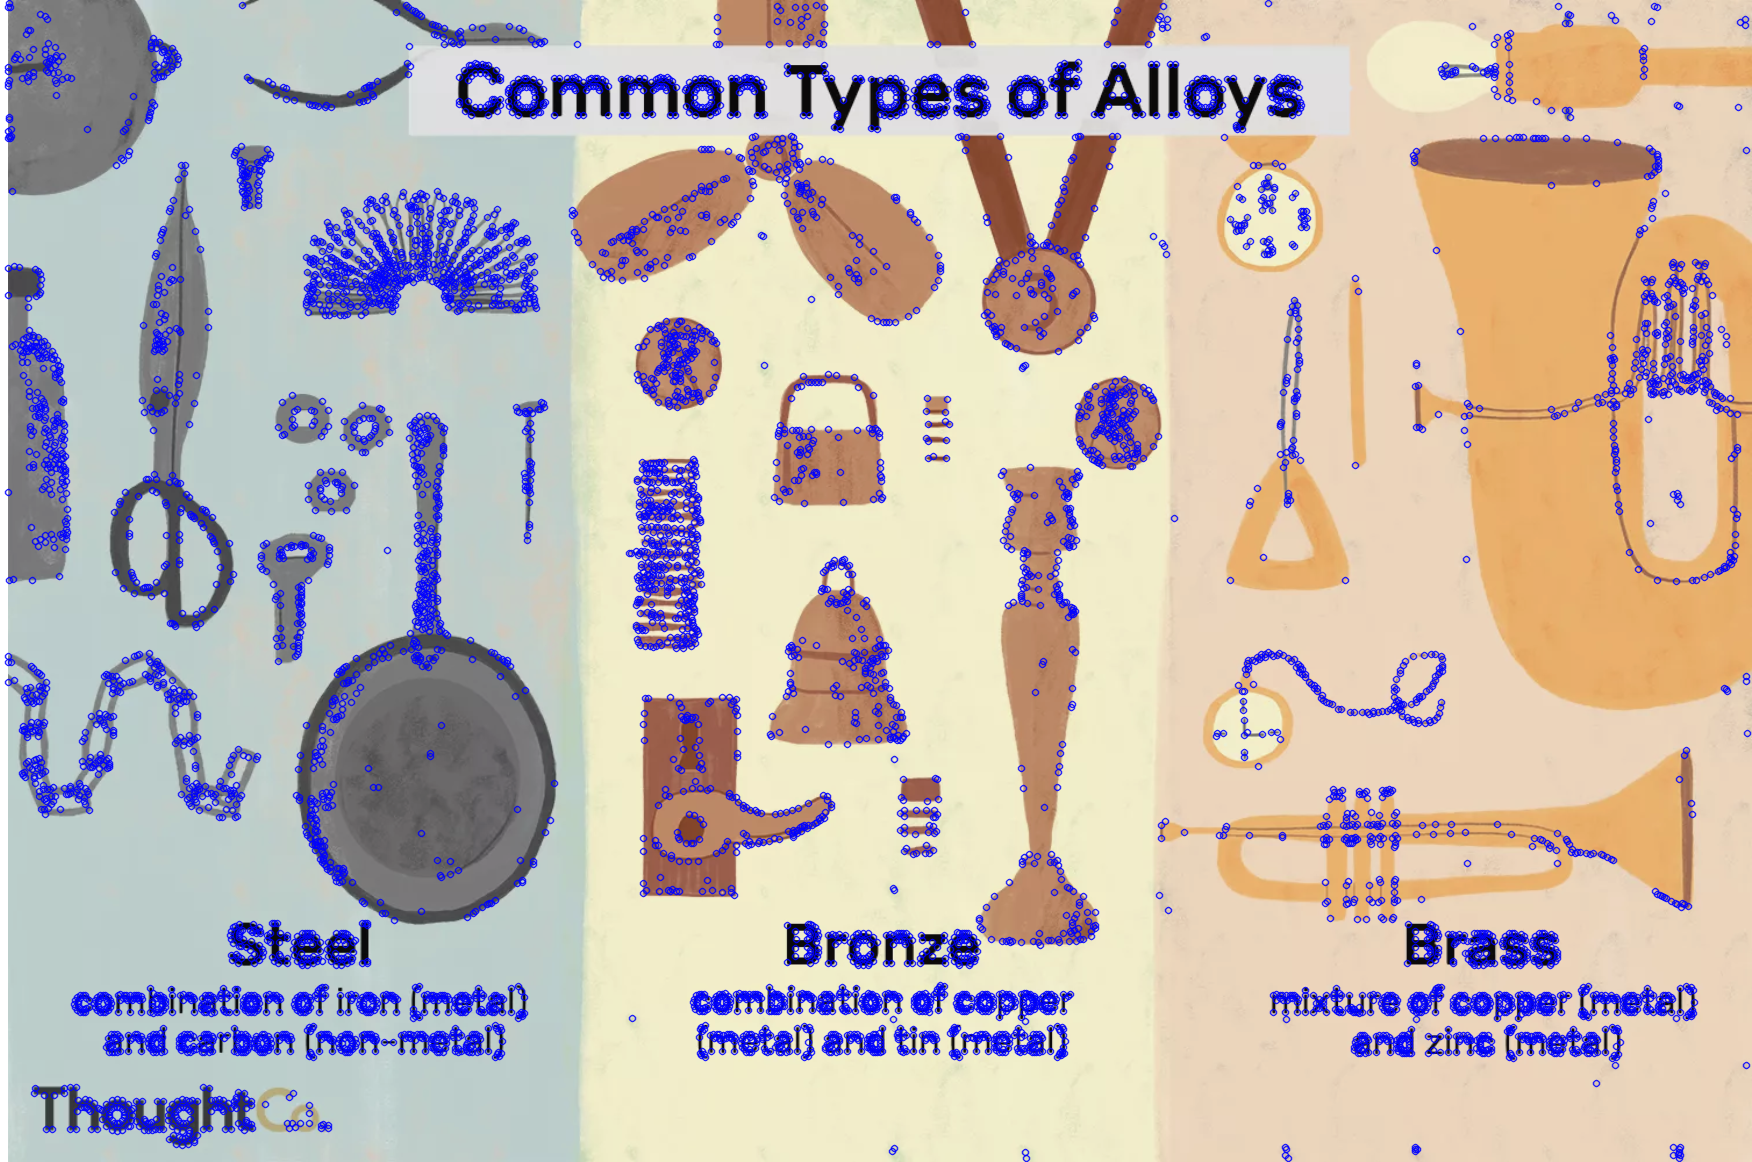

In [24]:
cv2_imshow(image_with_keypoints)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [25]:
#BRIEF

In [30]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [31]:
image1 = cv2.imread('/content/Screenshot 2023-10-05 at 17.43.34.png',cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('/content/Screenshot 2023-10-05 at 17.44.06.png',cv2.IMREAD_GRAYSCALE)

In [34]:
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

In [37]:
fast = cv2.FastFeatureDetector_create()
keypoints1 = fast.detect(image1,None)
keypoints2 = fast.detect(image2,None)
keypoints1,descriptors1 = brief.compute(image1,keypoints1)
keypoints2,descriptors2 = brief.compute(image2,keypoints2)

In [38]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
matchs = bf.match(descriptors1,descriptors2)

In [40]:
matchs = sorted(matchs,key=lambda x: x.distance)

In [43]:
matching_result = cv2.drawMatches(image1,keypoints1,image2,keypoints2,matchs[:10],outImg=None)

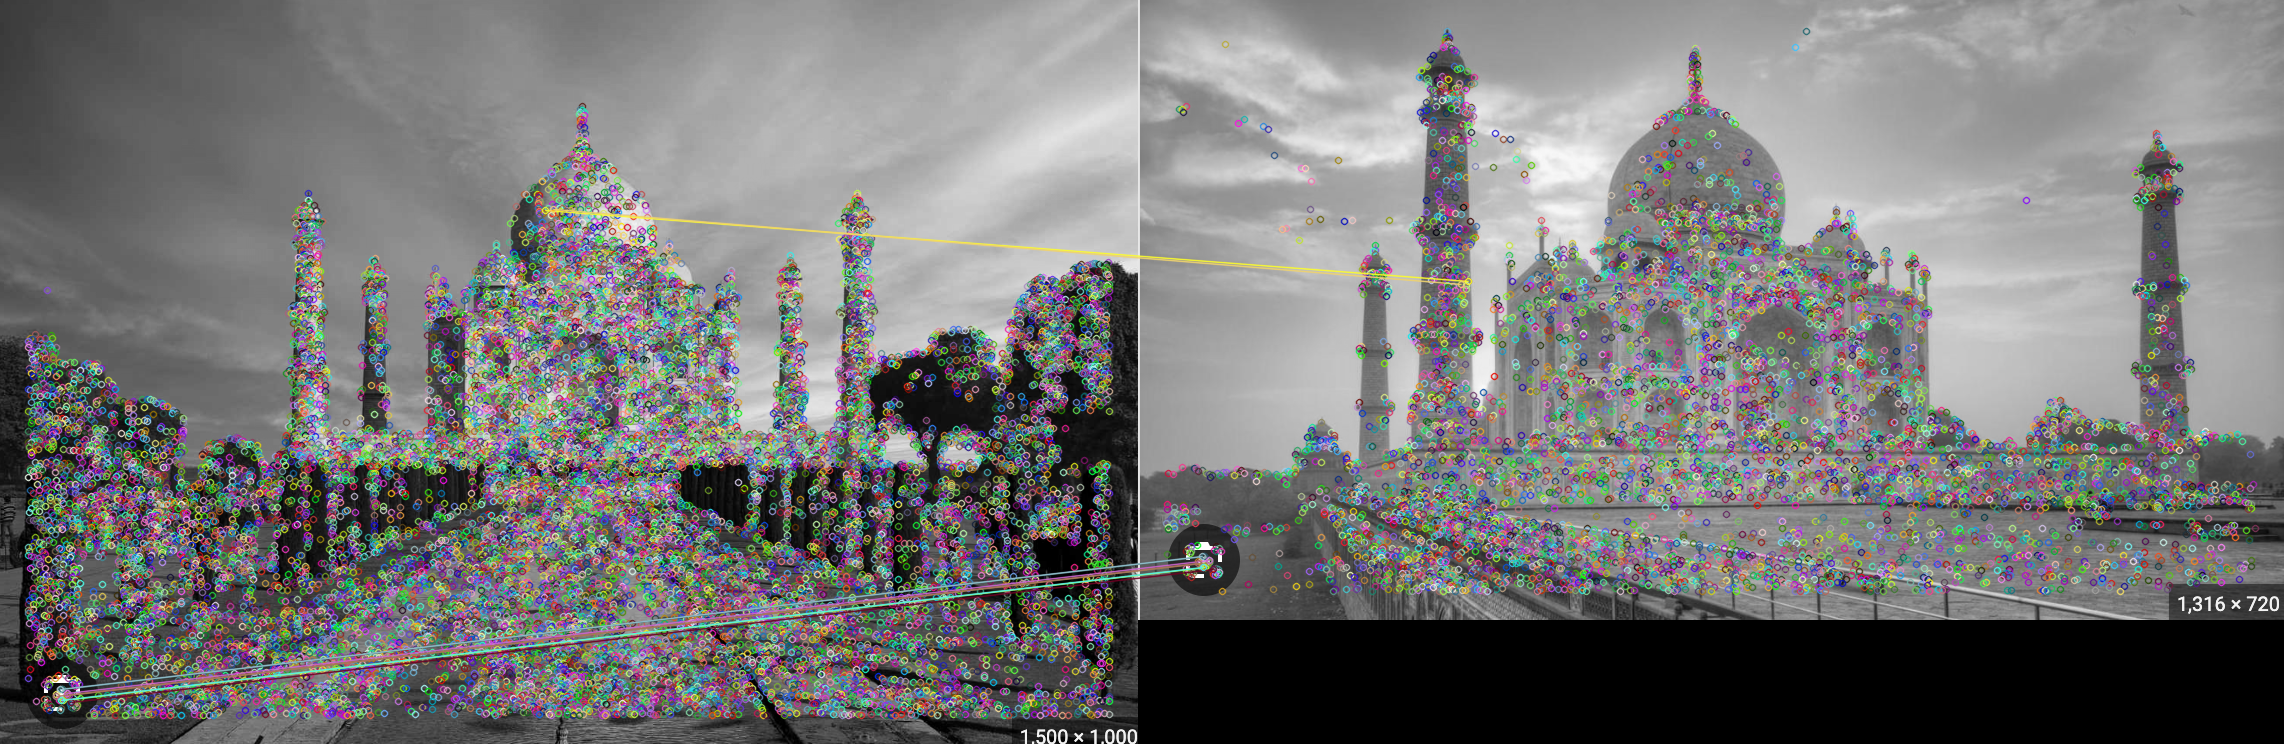

In [45]:
cv2_imshow(matching_result )
cv2.waitKey(0)
cv2.destroyAllWindows()